# Data Preparation #

In [1]:
import numpy as np
import pandas as pd
import math
import statistics as st
import scipy.stats
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Math, Latex
from IPython.core.display import Image

In [2]:
# Import Dataset
data_nyc = pd.read_csv('nyc-rolling-sales.csv')
data_nyc

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


Dari tabel diatas dapat dilihat bahwa kolom Easement merupakan kolom kosong sehingga tidak dibutuhkan untuk analisis dan boleh dihapus

# Data Preprocessing

In [3]:
# Menghapus kolom 
data_nyc.drop(columns=['Unnamed: 0', 'EASE-MENT'], inplace=True)
data_nyc

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [4]:
# Mengetahui dimensi dataframe 
data_nyc.shape

(84548, 20)

In [5]:
# Mengetahui informasi mengenai tipe data dataframe
data_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

Catatan yang kosong pada dataframe diatas tidak dikenali sebagai missing value sehingga harus dilakukan conversi dengan tipe data yang sesuai. terdapat beberapa kolom yang seharusnya menggunakan tipe data numerik dan terdapat pula kolom yang dapat menggunakan format datetime.

In [6]:
# Melihat kolom dengan tipe kategori
print('Column Name')
for col in data_nyc.columns :
    if data_nyc[col].dtype == 'object' :
        print(col, data_nyc[col].nunique()) # mengembalikan jumlah nilai unik tanpa NaN

Column Name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [7]:
# Mengkonversi tipe data
Numeric = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in Numeric :
    data_nyc[col] = pd.to_numeric(data_nyc[col], errors='coerce')

Category = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
            'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE', 'BOROUGH']
for col in Category :
    data_nyc[col] = data_nyc[col].astype('category')

data_nyc['SALE DATE'] = pd.to_datetime(data_nyc['SALE DATE'], errors='coerce')

# Mengetahui informasi mengenai tipe data
data_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  object        
 7   ADDRESS                         84548 non-null  object        
 8   APARTMENT NUMBER                84548 non-null  object        
 9   ZIP CODE                        84548 non-null  int64         
 10  RESIDENTIAL UNITS               84548 non-null  int64         
 11  CO

In [8]:
data_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  object        
 7   ADDRESS                         84548 non-null  object        
 8   APARTMENT NUMBER                84548 non-null  object        
 9   ZIP CODE                        84548 non-null  int64         
 10  RESIDENTIAL UNITS               84548 non-null  int64         
 11  CO

In [9]:
# Mengelompokkan kemudian mengubah data yang ada pada kolom borough
data_nyc['BOROUGH'] = data_nyc.BOROUGH.replace({1 : 'Jakarta', 2 : 'Bandung', 3 : 'Yogyakarta', 4 : 'Surabaya', 5 : 'Bali'})

In [10]:
# Membuat kolom baru
data_nyc['AGE'] = 2023 - data_nyc['YEAR BUILT']
data_nyc

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AGE
0,Jakarta,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,...,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,123
1,Jakarta,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,...,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14,123
2,Jakarta,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,...,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09,123
3,Jakarta,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,110
4,Jakarta,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,...,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Bali,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,...,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28,25
84544,Bali,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,...,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21,25
84545,Bali,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,...,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05,98
84546,Bali,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,...,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21,22


In [11]:
# Mengetahui informasi mengenai missing value
data_nyc.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
AGE                                   0
dtype: int64

In [12]:
#Menghapus missing Value
data_nyc = data_nyc.dropna()

In [13]:
#Memeriksa kembali jumlah missing value
data_nyc.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
AGE                               0
dtype: int64

In [14]:
data_nyc.describe().T

,count,mean,min,25%,50%,75%,max,std
BLOCK,48244.0,4984.532191,1.0,2206.75,4660.5,6996.0,16319.0,3427.41809
LOT,48244.0,234.324662,1.0,21.0,45.0,94.0,9009.0,496.361521
ZIP CODE,48244.0,10939.681328,0.0,10469.0,11217.0,11237.0,11694.0,1072.752086
RESIDENTIAL UNITS,48244.0,2.566537,0.0,1.0,1.0,2.0,1844.0,17.465481
COMMERCIAL UNITS,48244.0,0.249171,0.0,0.0,0.0,0.0,2261.0,10.988072
TOTAL UNITS,48244.0,2.834632,0.0,1.0,1.0,2.0,2261.0,20.750418
LAND SQUARE FEET,48244.0,3358.116553,0.0,1413.0,2140.0,3071.0,4228300.0,31435.8967
GROSS SQUARE FEET,48244.0,3669.752529,0.0,828.0,1620.0,2520.0,3750565.0,29474.911852
YEAR BUILT,48244.0,1827.765173,0.0,1920.0,1931.0,1961.0,2017.0,464.361153
SALE PRICE,48244.0,1153281.445817,0.0,80420.0,480000.0,830000.0,2210000000.0,13401309.193583


In [15]:
data_nyc

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AGE
0,Jakarta,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,...,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,123
3,Jakarta,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,110
4,Jakarta,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,...,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,123
6,Jakarta,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,...,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,103
9,Jakarta,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,...,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Bali,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,...,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28,25
84544,Bali,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,...,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21,25
84545,Bali,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,...,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05,98
84546,Bali,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,...,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21,22


In [16]:
# melihat dataframe dimana year built nya sama dengan 0
data_nyc[data_nyc['YEAR BUILT'] == 0]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AGE
18364,Bandung,BATHGATE,29 COMMERCIAL GARAGES,4,2918,29,G7,1885 BATHGATE AVENUE,,10457,...,0,0,3070.0,0.0,0,4,G7,2500000.0,2016-12-15,2023
18371,Bandung,BATHGATE,31 COMMERCIAL VACANT LAND,4,3028,13,V9,1996 WEBSTER AVENUE,,0,...,0,0,5945.0,0.0,0,4,V9,1200000.0,2016-10-19,2023
18373,Bandung,BATHGATE,41 TAX CLASS 4 - OTHER,4,2900,1,Z9,1816 WEBSTER AVENUE,,10457,...,0,0,3082.0,0.0,0,4,Z9,300000.0,2016-11-03,2023
18756,Bandung,BAYCHESTER,05 TAX CLASS 1 VACANT LAND,1B,4725,26,V0,1475 HICKS STREET,,10469,...,0,0,2375.0,0.0,0,1,V0,98000.0,2016-10-31,2023
18757,Bandung,BAYCHESTER,05 TAX CLASS 1 VACANT LAND,1B,4726,38,V0,3552 EASTCHESTER ROAD,,10469,...,0,0,3400.0,0.0,0,1,V0,0.0,2017-03-16,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53841,Surabaya,CORONA,07 RENTALS - WALKUP APARTMENTS,2B,1785,22,C1,112-48 38TH AVENUE,,11368,...,0,8,2500.0,6875.0,0,2,C1,2153222.0,2017-05-10,2023
54054,Surabaya,CORONA,41 TAX CLASS 4 - OTHER,4,1961,1,Z9,5506 VAN CLEEF STREET,,11368,...,0,0,926.0,384.0,0,4,Z9,113000.0,2017-08-09,2023
57321,Surabaya,FLUSHING-NORTH,08 RENTALS - ELEVATOR APARTMENTS,2B,5186,56,D3,142-11 CHERRY AVENUE,,11355,...,0,10,2850.0,10111.0,0,2,D3,4000000.0,2017-05-19,2023
65906,Surabaya,LITTLE NECK,01 ONE FAMILY DWELLINGS,1,8229,80,A3,45-39 BROWVALE LANE,,11362,...,0,1,9562.0,5291.0,0,1,A3,1731025.0,2017-04-06,2023


In [17]:
# Menghapus baris dimana year built nya berisi 0
data_nyc = data_nyc[data_nyc['YEAR BUILT'] != 0]

In [18]:
data_nyc

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AGE
0,Jakarta,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,...,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,123
3,Jakarta,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,110
4,Jakarta,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,...,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,123
6,Jakarta,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,...,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,103
9,Jakarta,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,...,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Bali,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,...,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28,25
84544,Bali,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,...,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21,25
84545,Bali,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,...,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05,98
84546,Bali,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,...,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21,22


In [19]:
data_nyc[data_nyc['LAND SQUARE FEET'] == 0]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AGE
18354,Bandung,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,D4,"463 EAST 178TH STREET, 6E",,10457,...,0,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17,88
18355,Bandung,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,D4,"463 EAST 178TH ST, 6B",,10457,...,0,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17,88
18356,Bandung,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3044,40,D4,"495 E 178TH STREET, 2H",,10457,...,0,0,0.0,0.0,1941,2,D4,60000.0,2016-12-01,82
18746,Bandung,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1009,R3,2877 ELY AVENUE,3,10469,...,0,1,0.0,0.0,2008,1,R3,310000.0,2017-02-28,15
18747,Bandung,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1027,R3,2853 ELY AVENUE,3,10469,...,0,1,0.0,0.0,2008,1,R3,342500.0,2017-07-31,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49292,Yogyakarta,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,RP,207 PROSPECT PARK SW,P35,11218,...,0,1,0.0,0.0,1990,4,RP,0.0,2017-07-25,33
49293,Yogyakarta,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,RP,207 PROSPECT PARK SW,P35,11218,...,0,1,0.0,0.0,1990,4,RP,0.0,2017-07-17,33
49294,Yogyakarta,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1213,RS,11 TERRACE PLACE,S2,11218,...,0,1,0.0,0.0,2006,4,RS,0.0,2016-10-06,17
49295,Yogyakarta,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1219,RS,11 TERRACE PLACE,S8,11218,...,0,1,0.0,0.0,2006,4,RS,0.0,2016-10-24,17


In [20]:
data_nyc[data_nyc['GROSS SQUARE FEET'] == 0]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AGE
18354,Bandung,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,D4,"463 EAST 178TH STREET, 6E",,10457,...,0,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17,88
18355,Bandung,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,D4,"463 EAST 178TH ST, 6B",,10457,...,0,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17,88
18356,Bandung,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3044,40,D4,"495 E 178TH STREET, 2H",,10457,...,0,0,0.0,0.0,1941,2,D4,60000.0,2016-12-01,82
18746,Bandung,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1009,R3,2877 ELY AVENUE,3,10469,...,0,1,0.0,0.0,2008,1,R3,310000.0,2017-02-28,15
18747,Bandung,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1027,R3,2853 ELY AVENUE,3,10469,...,0,1,0.0,0.0,2008,1,R3,342500.0,2017-07-31,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49292,Yogyakarta,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,RP,207 PROSPECT PARK SW,P35,11218,...,0,1,0.0,0.0,1990,4,RP,0.0,2017-07-25,33
49293,Yogyakarta,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,RP,207 PROSPECT PARK SW,P35,11218,...,0,1,0.0,0.0,1990,4,RP,0.0,2017-07-17,33
49294,Yogyakarta,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1213,RS,11 TERRACE PLACE,S2,11218,...,0,1,0.0,0.0,2006,4,RS,0.0,2016-10-06,17
49295,Yogyakarta,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1219,RS,11 TERRACE PLACE,S8,11218,...,0,1,0.0,0.0,2006,4,RS,0.0,2016-10-24,17


In [21]:
data_nyc = data_nyc[data_nyc['LAND SQUARE FEET'] != 0]
data_nyc = data_nyc[data_nyc['GROSS SQUARE FEET'] != 0]

In [22]:
data_nyc

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AGE
0,Jakarta,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,...,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,123
3,Jakarta,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,110
4,Jakarta,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,...,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,123
6,Jakarta,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,...,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,103
9,Jakarta,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,...,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Bali,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,...,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28,25
84544,Bali,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,...,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21,25
84545,Bali,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,...,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05,98
84546,Bali,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,...,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21,22


In [23]:
# Melihat informasi mengenai data duplikasi
data_nyc.duplicated().sum()

290

In [24]:
# Menghapus data duplikasi
data_nyc.drop_duplicates(inplace = True)

In [25]:
data_nyc

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AGE
0,Jakarta,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,...,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,123
3,Jakarta,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,110
4,Jakarta,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,...,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,123
6,Jakarta,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,...,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,103
9,Jakarta,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,...,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Bali,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,...,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28,25
84544,Bali,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,...,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21,25
84545,Bali,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,...,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05,98
84546,Bali,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,...,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21,22


# Measure of Central Tendency : Mean
Central tendency mengacu pada gagasan bahwa satu bilangan yang paling baik untuk meringkas seluruh rangkaian pengukuran. Mean atau bisa disebut juga average merupakan central tendency dari data, angka diantara seluruh data tersebar. Mean dihitungan dengan menjumlahkan seluruh nilai dan dibagi dengan jumlah nilai. Untuk ini akan dicari Mean untuk setiap total units yang ada pada setiap borough

In [26]:
totalunits = data_nyc.groupby(['BOROUGH'])['TOTAL UNITS'].sum().reset_index()
totalunits

,BOROUGH,TOTAL UNITS
0,Jakarta,21360
1,Bandung,23735
2,Yogyakarta,45473
3,Surabaya,28108
4,Bali,7327


In [27]:
mean_tots = totalunits['TOTAL UNITS'].mean()
print('Mean of Total Units per Borough : ', mean_tots)

Mean of Total Units per Borough :  25200.6


Berdasarkan analisis tersebut dapat kita lihat bahwa mean dari total units yang ada pada setiap borough adalah 25200.6 yang didapat dari jumlah unit yang dibagi dengan banyak borough.

# Measure of Central Tendency : Median
Median adalah nilai yang membagi data dalam 2 bagian yang sama yaitu suku di sisi kanannya sama dengan jumlah suku di sisi kirinya pada saat data disusun dalam urutan naik atau turun. Median juga disebut nilai tengah pada data. Pada kali ini yang akan dicari adalah median dari data sale price berdasarkan borough pada dataset.

In [28]:
saleprice = data_nyc.loc[:, ['BOROUGH', 'SALE PRICE']]
saleprice

,BOROUGH,SALE PRICE
0,Jakarta,6625000.0
3,Jakarta,3936272.0
4,Jakarta,8000000.0
6,Jakarta,3192840.0
9,Jakarta,16232000.0
...,...,...
84543,Bali,450000.0
84544,Bali,550000.0
84545,Bali,460000.0
84546,Bali,11693337.0


In [29]:
median_sales = saleprice['SALE PRICE'].median()
print('Median of Sale Price : ', median_sales)

Median of Sale Price :  509574.0


In [30]:
median_saleprices = saleprice.groupby('BOROUGH').median()
median_saleprices

,SALE PRICE
BOROUGH,
Jakarta,6500000.0
Bandung,382000.0
Yogyakarta,405000.0
Surabaya,635000.0
Bali,485000.0


# Measure of Central Tendency : Modus
Mode atau modus adalah nilai yang muncul secara maksimum dalam kumpulan data, dimana nilai tersebut memiliki frekuensi paling tinggi. Berikut ini akan dicari mode dari Building Category :

In [31]:
buildingclass = data_nyc.loc[:, ['BUILDING CLASS CATEGORY']]
buildingclass

,BUILDING CLASS CATEGORY
0,07 RENTALS - WALKUP APARTMENTS
3,07 RENTALS - WALKUP APARTMENTS
4,07 RENTALS - WALKUP APARTMENTS
6,07 RENTALS - WALKUP APARTMENTS
9,08 RENTALS - ELEVATOR APARTMENTS
...,...
84543,02 TWO FAMILY DWELLINGS
84544,02 TWO FAMILY DWELLINGS
84545,02 TWO FAMILY DWELLINGS
84546,22 STORE BUILDINGS


In [32]:
mode_buildingclass = buildingclass.mode()
print('Mode of Building Class Category: ', mode_buildingclass)

Mode of Building Class Category:                         BUILDING CLASS CATEGORY
0  01 ONE FAMILY DWELLINGS                    


Setelah dilakukan data cleaning untuk Building Class Category paling banyak adalah ONE FAMILY DWELLINGS

# Measure of Spread : Range 

In [33]:
# age
np.ptp(data_nyc['AGE'])

217

In [34]:
np.amax(data_nyc['AGE']) - np.amin(data_nyc['AGE'])

217

Range Usia bangunan dari dataset NYC-ROLLING-SALES ini berada di antara 217 tahun.

# Measure of Spread : Variance
Variance adalah kuadrat jarak rata-rata antara setiap kuantitas dan mean. variance dihitung dengan mencari selisih antara setiap titik data dan mean, lalu mengkuadratkannya, menjumlahkannya, dan kemudian mengambil rata-rata dari angka angka itu. Berikut ini nilai Variance untuk data Sale Price dan data Age

In [35]:
saleprice['SALE PRICE'].var()

232181206115867.62

In [36]:
saleprice.groupby('BOROUGH').var()

,SALE PRICE
BOROUGH,
Jakarta,8.042303e+15
Bandung,1.055569e+13
Yogyakarta,1.386137e+13
Surabaya,1.378961e+13
Bali,2.268669e+11


In [37]:
data_nyc['AGE'].var()

913.3779781922569

# Measure of Spread : Standard Deviation
Deviasi standar adalah ukuran statistik yang mengukur sejauh mana data tersebar atau bervariasi dari nilai rata-rata (mean) dalam sebuah kumpulan data. Deviasi standar memberikan gambaran tentang seberapa tersebar data di sekitar nilai rata-rata. Standard Deviation adalah cara lain untuk mengukur penyebaran data yang berhubungan dengan varians sampel karena merupakan positive square root dari sample variance. Berikut ini nilai dari standard deviation untuk data sale price

In [38]:
saleprice['SALE PRICE'].var() ** 0.5

15237493.432840837

In [39]:
saleprice['SALE PRICE'].std()

15237493.432840837

Berdasarkan data diatas dapat diketahui Standard Deviation dari SALE PRICE adalah 15237493.432840837. Dengan kata lain, nilai 'SALE PRICE' bervariasi sekitar ± 15237493.43 dari nilai rata-ratanya.

In [40]:
data_nyc['AGE'].std()

30.22214383845489

In [41]:
data_nyc['AGE'].var() ** 0.5

30.22214383845489

Berdasarkan data diatas dapat diketahui Standard Deviation dari AGE adalah 30.22214383845489. Dengan kata lain, nilai 'AGE' bervariasi sekitar ± 30.22 dari nilai rata-ratanya.

# Probability Distribution
Probability Distribution adalah fungsi di bawah teori dan statistika probabilitas yang memberikan informasi mengenai seberapa besar kemungkinan hasil yang berbeda dalam sebuah eksperimen. Probability Distribution adalah fungsi matematis yang menggambarkan sebaran probabilitas dari berbagai nilai yang mungkin dalam sebuah variabel acak atau suatu kejadian.

In [42]:
saleprices = saleprice['SALE PRICE']

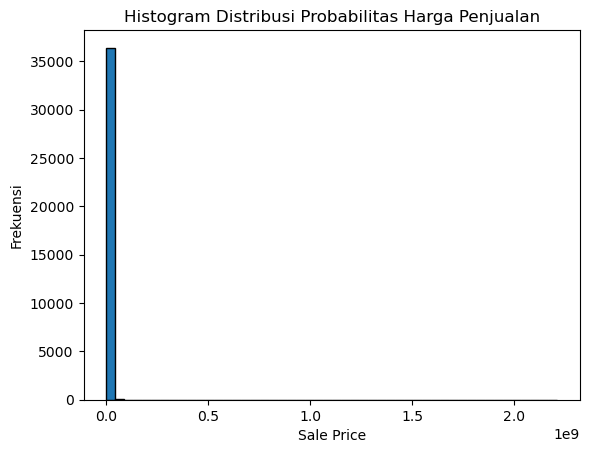

In [43]:
distribusi_probabilitas = saleprices.value_counts(normalize=True)
plt.hist(saleprices, bins=50, edgecolor='k')
plt.xlabel('Sale Price')
plt.ylabel('Frekuensi')
plt.title('Histogram Distribusi Probabilitas Harga Penjualan')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 1000x2000 with 0 Axes>

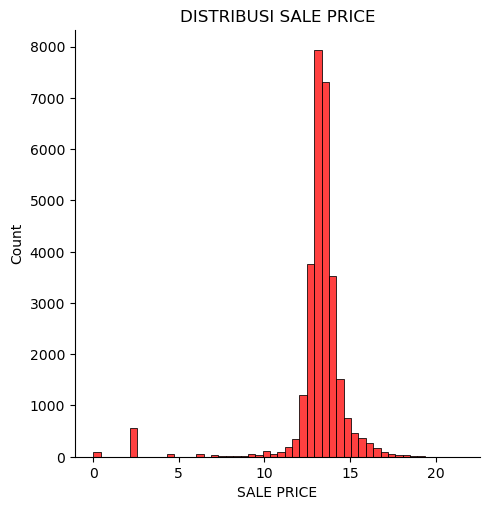

In [44]:
saleprice['SALE PRICE'] = np.log(saleprice['SALE PRICE'])
plt.figure(figsize=(10,20))
sns.displot(saleprice['SALE PRICE'], bins=50, color='red')
plt.title('DISTRIBUSI SALE PRICE')
plt.show()

Berdasarkan plot diatas dapat diketahui bahwa distribusi probabilitas untuk sale price pada wilayah Jakarta

# Confidence Intervals
Confidence Intervals adalah rentang nilai yang mengandung nilai parameter populasi dengan tingkat kepercayaan tertentu. CI biasanya dinyatakan dengan rentang dari nilai terendah (lower bound) ke nilai tertinggi (upper bound). Confidence Interval adalah rentang antara dua nilai di mana nilai suatu sample Mean tepat berada di tengah tengahnya.

In [45]:
CI = data_nyc.groupby('BOROUGH').agg({'SALE PRICE': [np.mean, np.std, np.size]})
CI

SALE PRICE                     
                    mean           std   size
BOROUGH                                      
Jakarta     1.920741e+07  8.967889e+07    965
Bandung     7.318103e+05  3.248952e+06   4903
Yogyakarta  8.972490e+05  3.723086e+06  14560
Surabaya    9.101956e+05  3.713437e+06  11047
Bali        5.284662e+05  4.763055e+05   5040

In [46]:
mean_ = CI.iloc[1,0]
sd = CI.iloc[1,1]
n = CI.iloc[1,2]
z = 1.96 # z-score untuk confidence level 95%
se = sd/np.sqrt(n)

In [47]:
print('lower bound: ',mean_ - z* se)
print('upper bound: ',mean_ + z* se)

lower bound:  640867.5304620138
upper bound:  822753.1589118389


In [48]:
n = len(CI)
margin_of_error = z * (sd / np.sqrt(n))
lower_bound = mean_ - margin_of_error
upper_bound = mean_ + margin_of_error

print(f"95% confidence interval: [{lower_bound:.2f}, {upper_bound:.2f}]")

95% confidence interval: [-2116021.45, 3579642.14]


Interval kepercayaan 95% untuk rata-rata harga penjualan properti di Borough tertentu adalah [-2,116,021.45, 3,579,642.14]. Ini berarti dengan tingkat kepercayaan 95%, dapat dipastikan bahwa rata-rata harga penjualan properti di Borough tersebut berada dalam rentang tersebut.

# Hypothesis Testing
Hypothesis testing adalah metode statistik yang digunakan untuk menguji asumsi yang diajukan tentang populasi berdasarkan sampel data yang tersedia. Tujuannya adalah untuk menentukan apakah klaim tersebut memiliki dasar yang cukup kuat dalam data yang diamati atau apakah itu mungkin terjadi secara acak. Hypothesis testing adalah salah satu alat penting dalam analisis statistik untuk membuat keputusan berdasarkan data.

In [49]:
data_sale = data_nyc[data_nyc['SALE PRICE'] > 0]
data_borough = data_nyc[data_nyc['BOROUGH'].isin(['Jakarta', 'Bandung'])]

In [50]:
Jakarta_prices = data_borough[data_borough['BOROUGH'] == 'Jakarta']['SALE PRICE']
Bandung_prices = data_borough[data_borough['BOROUGH'] == 'Bandung']['SALE PRICE']
t_stat, p_value = ttest_ind(Jakarta_prices, Bandung_prices, equal_var=False)

In [51]:
print('T-statistic:', t_stat)
print('P-value:', p_value)

alpha = 0.05
if p_value < alpha:
    print('Hipotesis nol ditolak')
else:
    print('Hipotesis nol diterima')

T-statistic: 6.399054874126722
P-value: 2.4354614372907906e-10
Hipotesis nol ditolak


Berdasarkan hasil uji hipotesis, dapat disimpulkan bahwa terdapat perbedaan yang signifikan antara rata-rata harga penjualan properti di Jakarta dan Bandung. Oleh karena itu, hipotesis nol ditolak. Artinya, ada bukti yang cukup kuat bahwa rata-rata harga penjualan properti di kedua kota tersebut tidak sama.

# Overall Analysis

- Setelah melakukan data cleaning dataset yang tadinya memiliki 84548 bari dan 22 kolom berkurang menjadi 36515 baris dan 21 kolom. Dataset tersebut berkurang karena data null, missing value dan data duplikat sudah dihapus yang mana hal tersebut berpengaruh pada tingkat keakuratan data.
- Mean dari total units berdasarkan borough adalah 25200.6
- Data yang paling sering muncul pada BUILDING CLASS CATEGORY adalah ONE FAMILY DWELLINGS